
# 3i4k Project

In [1]:
import pandas as pd
import numpy as np

### 데이터 다운로드

---



In [2]:
!wget https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_train_val.txt
!wget https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_test.txt

--2021-09-30 14:40:57--  https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_train_val.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2661060 (2.5M) [text/plain]
Saving to: ‘fci_train_val.txt’

fci_train_val.txt   100%[===================>]   2.54M  --.-KB/s    in 0.06s   

2021-09-30 14:40:57 (39.2 MB/s) - ‘fci_train_val.txt’ saved [2661060/2661060]

--2021-09-30 14:40:57--  https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 



*  **Classification (7-class)**



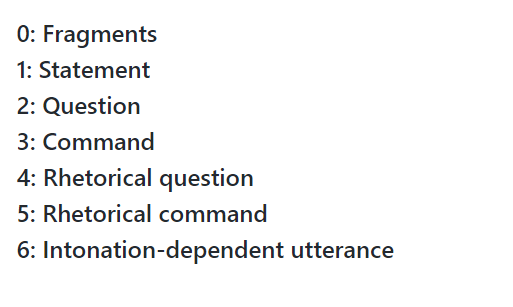

### 데이터 로드 및 확인

---



In [3]:
#데이터 불러오기

def read_data(filename):

    with open(filename, "r", encoding="UTF8") as f:
        data = [line.split("\t") for line in f.read().splitlines()]

    return data

In [4]:
#데이터확인
train_data = read_data("/content/fci_train_val.txt")
print("train_data : ", train_data[:5])
print()

#X,y
X_train_data = [t[1] for t in train_data]
y_train_data = [int(t[0]) for t in train_data]


#데이터확인
test_data = read_data("/content/fci_test.txt")
print("test_data  : ", test_data[:5])
print()

#X,y
X_test_data = [t[1] for t in test_data]
y_test_data = [int(t[0]) for t in test_data]

train_data :  [['0', '만화'], ['0', '이치가'], ['0', '약'], ['0', '그사이'], ['0', '짜긴']]

test_data  :  [['0', '연두색'], ['0', '되면'], ['0', '오'], ['0', '그걸루'], ['0', '연구소']]



In [5]:
print("X_train_data : ", X_train_data[:5])
print()
print('y_train_data : ', y_train_data[:5])

X_train_data :  ['만화', '이치가', '약', '그사이', '짜긴']

y_train_data :  [0, 0, 0, 0, 0]


In [6]:
#특수문자 없는지 확인
import re
pattern = "[.,/?!:@#$%]"
for text in X_train_data : 
    result = re.findall(pattern,text)
    if result : 
        print(text, result)

In [7]:
import re
pattern = "[.,/?!:@#$%]"
for text in X_test_data : 
    result = re.findall(pattern,text)
    if result : 
        print(text, result)

In [8]:
print(len(X_train_data))
print(len(y_train_data))
print(len(X_test_data))
print(len(y_test_data))

55134
55134
6121
6121


In [164]:
#카테고리 별 개수 확인
from collections import Counter
result=Counter(y_train_data)
for key in result:
  print(key, result[key])

0 5409
1 16470
2 16083
3 11672
4 1571
5 979
6 2950


In [9]:
#질문,요구 데이터 예시 

i = 0
t = 0
for data in train_data :
    if int(data[0]) == 2 :
        print("question example : {}, [{}]".format(data[1],train_data.index(data)))
        i = i+1
    
    if i == 4 : 
        break

print()
for data in train_data :

    if int(data[0]) == 3 :
        print("command example : {}, [{}]".format(data[1], train_data.index(data)))
        t += 1

    if t == 4 :
        break


question example : 안방 스탠드가 나이트 모드로 되어있니, [19692]
question example : 미얀마 체감온도가 몇도니, [19693]
question example : 경부 고속도로 내 소통 원활한 구간은 어떨까, [19694]
question example : 오늘 지진 진도 몇이었어, [19695]

command example : 팔월칠일부터 이십이일까지 외출할동안 전기최저모드로 해줘, [34167]
command example : 오늘 온 이메일 확인해줘, [34168]
command example : 세무사 메일 검색해, [34169]
command example : 보낸 편지함 열어줘, [34170]


## Preprocessing

### 01. Stopword

---





*   한국어 불용어를 처리하는 가장 좋은 방법 :불용어 직접 정리 후 사용
*   참고 가능한 한국어 불용어 리스트 

    *   https://www.ranks.nl/stopwords/korean
    *   https://bab2min.tistory.com/544 
    *   https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt

In [10]:
#불용어 사전 가져오기

df = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt', header=None)
df[0] = df[0].apply(lambda x: x.strip())

stopwords = df[0].to_numpy()

print(stopwords)
print(len(stopwords))

['이' '있' '하' '것' '들' '그' '되' '수' '이' '보' '않' '없' '나' '사람' '주' '아니' '등' '같'
 '우리' '때' '년' '가' '한' '지' '대하' '오' '말' '일' '그렇' '위하' '때문' '그것' '두' '말하'
 '알' '그러나' '받' '못하' '일' '그런' '또' '문제' '더' '사회' '많' '그리고' '좋' '크' '따르' '중'
 '나오' '가지' '씨' '시키' '만들' '지금' '생각하' '그러' '속' '하나' '집' '살' '모르' '적' '월' '데'
 '자신' '안' '어떤' '내' '경우' '명' '생각' '시간' '그녀' '다시' '이런' '앞' '보이' '번' '나' '다른'
 '어떻' '여자' '개' '들' '사실' '이렇' '점' '싶' '말' '정도' '좀' '원' '잘' '통하' '소리' '놓']
98



### 02. Text Data Augmentation




---





*   논문 출처 : https://arxiv.org/pdf/1901.11196.pdf

*     참고 자료 : https://github.com/catSirup/KorEDA/blob/master/eda.py


         RS : 문장 내 임의의 두 단어 위치 바꿈

             (참고) 논문에선 그 외에도 RD,RI,SR 소개




*  원문의 라벨 대체로 잘 따른다는 결과

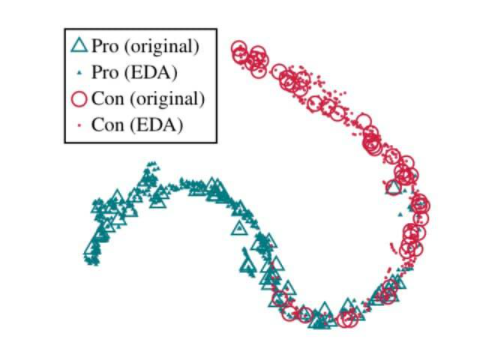




           * α는 단어 백분율 나타내는 매개 변수
           * 원래 문장당 n_aug개의 증강된 문장 생성
           * RS는 α≤0.2에서 높은 성능

  
<논문 추천 파라미터>


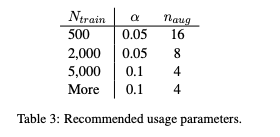

In [11]:
# Random swap
# Randomly swap two words in the sentence n times
import random

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0

	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words

	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words

def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)

	return new_words

In [12]:
def EDA(sentence, alpha_rs=0.1, num_aug=4): #논문 추천 parameter 사용
    words = sentence.split(' ')
    num_words = len(words)
    
    augmented_sentences = []
    num_new_per_technique = int(num_aug/4) + 1

    n_rs = max(1, int(alpha_rs*num_words))

    #rs
    for x in range(num_new_per_technique): 
        a_words = random_swap(words, n_rs)
        augmented_sentences.append(" ".join(a_words))

    if num_aug >= 1:
        augmented_sentences = augmented_sentences[:num_aug]
    
    augmented_sentences.append(sentence)
  
    return augmented_sentences

In [13]:
#예시
sentence = "김철수는 극중 두 인격의 사나이 이광수 역을 맡았다 "
aug = EDA(sentence)
aug

['김철수는 극중 인격의 두 사나이 이광수 역을 맡았다 ',
 '이광수 극중 두 인격의 사나이 김철수는 역을 맡았다 ',
 '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다 ']

In [14]:
#X_train에 대해 augmentation 실시
aug = []
for sentence in X_train_data : 
    augmented_sentences = EDA(sentence, alpha_rs = 0.1, num_aug = 4)
    aug.append(augmented_sentences)

print(len(aug)) 
print(len(y_train_data))

55134
55134


In [15]:
#질문 데이터 예시 
#augmentation 된 문장이 list형태로 저장되어 있음.

print("original question example : {}".format(X_train_data[19692]))
print("augmented question example : {}:".format(aug[19692]))

original question example : 안방 스탠드가 나이트 모드로 되어있니
augmented question example : ['안방 모드로 나이트 스탠드가 되어있니', '되어있니 스탠드가 나이트 모드로 안방', '안방 스탠드가 나이트 모드로 되어있니']:


In [41]:
#augmentation 된 데이터 - 해당 라벨 추가

X_train_aug = ['default']
y_train_aug = ['default']
for sentence in aug : #각 문장에 대해 3개의 swap된 문장과 본래 문장으로 구성된 리스트 
    index = aug.index(sentence)
    for aug_sentence in sentence : 
        if aug_sentence != X_train_aug[-1]: #num_aug가 4로 설정되어 있기 떄문에 단어수가 적은 문장의 경우 중복값이 생길 수 있음, 
        #X_train_aug의 모든 데이터에 대해 탐색을 할 수도 있지만, 시간이 너무 오래걸림. 순서가 붙어있지 않는 경우 중복 처리 불가, 밑에서 형태소 분석 후 중복값 처리 한번 더 실시
          X_train_aug.append(aug_sentence.strip()) #맨 끝에 공백 생기는 경우 공백 제거
          y_train_aug.append(y_train_data[index])
    
X_train_aug=X_train_aug[1:]
y_train_aug=y_train_aug[1:]
#55134 --> 145807

print(len(X_train_aug))
print(len(y_train_aug))


145807
145807


In [42]:
X_train_aug[1]

'신청'

In [165]:
#augmentation 과정 생략을 위해 txt 파일에 저장 #파일명 및 변수이름은 추후 가독성이 좋게 바꾸겠음
with open ('X_train_aug.txt','w') as f:
  for sent in X_train_aug:
    f.write(sent+'\n')

In [44]:
f=open('/content/X_train_aug.txt','r')
kk=f.readlines()
kkk=[]
for x in kk:
  kkk.append(x.strip())
for x in range(len(kkk)):
  if kkk[x]!=X_train_aug[x]:
    print(kkk[x],x,X_train_aug[x])

### 03. 토큰화 및 인코딩

---



In [45]:
!pip install konlpy
!pip install soynlp

     |████████████████████████████████| 19.4 MB 44.6 MB/s 
     |████████████████████████████████| 448 kB 46.9 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
     |████████████████████████████████| 416 kB 5.3 MB/s 


In [ ]:
import konlpy
from konlpy.tag import Okt
okt = Okt() 

In [61]:
#augment되지 않은 데이터 중 한 번밖에 등장하지 않는 단어를 제거하기 위해 임시 토큰화 진행
#문장을 형태소 단위로 분리
X_train_for_rare=[okt.morphs(row) for row in X_train_data]
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train_for_rare)
rare_word_temp=[x for x, y in tokenizer.word_counts.items() if y==1] 

In [62]:
rare_cnt=len(rare_word_temp)
total_cnt=len(tokenizer.word_index)
in_sent=sum([y for x, y in tokenizer.word_counts.items()]) 
print(rare_cnt, total_cnt, in_sent)
# 전체 단어의 절반 이상이 한 번밖에 등장하지 않음
# 전체 문장의 등장 빈도는 낮음

16082 31454 381803


In [64]:
#추후 형태소 분석 과정을 넘기기 위해 불러올 수 있도록 txt파일로 저장
with open ('rare_words.txt','w') as f:
  for words in rare_word_temp:
    f.write(words+'\n')

In [129]:
#형태소 토큰화
import konlpy
from konlpy.tag import Okt
okt = Okt()

X_train=[]
for sentence in X_train_aug : 
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords and not word in rare_word_temp] #불용어, 1회 등장어에 해당하지 않는 토큰만 저장
    X_train.append(temp_X)

X_test = [] 
for sentence in X_test_data : 
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords and not word in rare_word_temp] #불용어, 1회 등장어에 해당하지 않는 토큰만 저장
    X_test.append(temp_X)

In [ ]:
#텍스트/리스트 넣었을 때 한번에 preprocessing 가능토록 하고, 길어지면 py파일로 만들어 불러올 예정
def token_kor(rare_words='rare_words.txt',data='X_train_aug.txt'): 
  df = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt', header=None)
  df[0] = df[0].apply(lambda x: x.strip())
  stopwords = df[0].to_numpy()
  rare_words_list=[]
  if type(rare_words) is str:
    ff=open('/content/'+rare_words,'r')
    ee=ff.readlines()
    for x in ee:
      rare_words_list.append(x)
  else:
    rare_words_list=rare_words
  if type(rare_words) is str:
    f=open('/content/'+data,'r')
    kk=f.readlines()
    data_list=[]
    for x in kk:
      data_list.append(x.strip())
  else:
    data_list=data
    data_token=[]
  for sentence in data_list: 
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords and not word in rare_words_list] #불용어에 해당하지 않는 토큰만 저장
    data_token.append(temp_X)
  return data_token
  
xx=token_kor()

In [66]:
X_train_aug[100000]

'제목에 삭제해 적힌 메일들 모두 광고라고'

In [69]:
for x in X_train:
  for z in x:
    if z in rare_word_temp:
      print('!') 

In [68]:
len(X_train)
print(X_train[10700])

['예수님', '은', '세상', '에', '한자', '아니다', '말씀', '하다']


In [91]:
#정수 인코딩 
from keras.preprocessing.text import Tokenizer
tokenizer_temp = Tokenizer() 
tokenizer_temp.fit_on_texts(X_train)
tokenizer_aug=Tokenizer(len(tokenizer_aug.word_index)+2,oov_token='OOV')
tokenizer_aug.fit_on_texts(X_train)
X_train_texttoseq=tokenizer_aug.texts_to_sequences(X_train)
print(X_train_aug[-6:-1])
print(X_train[-6:-1])
print(X_train_texttoseq[-6:-1])

['먹을래 개 몇', '개 몇 먹을래', '몇 개 먹을래', '오늘 기차 올라가는 오후에 취소해', '오늘 오후에 취소해 기차 올라가는']
[['먹다', '몇'], ['몇', '먹다'], ['몇', '먹다'], ['오늘', '기차', '올라가다', '오후', '에', '취소', '하다'], ['오늘', '오후', '에', '취소', '하다', '기차', '올라가다']]
[[66, 21], [21, 66], [21, 66], [10, 1072, 820, 63, 3, 110, 2], [10, 63, 3, 110, 2, 1072, 820]]


In [159]:
X_train_last=[]
y_train_last=[]
for i in range(len(X_train_texttoseq)):
  if i!=0 and X_train_texttoseq[i]!=X_train_texttoseq[i-1]and len(X_train_texttoseq[i])>0: #중복되는 경우 제거(위의 개 몇 먹을래/몇 개 먹을래) #stopwords, rarewords 제외하면 빈 리스트만 남는 경우 생김
    X_train_last.append(X_train_texttoseq[i])
    y_train_last.append(y_train_aug[i])
#X_test = tokenizer.texts_to_sequences(X_test)
print(len(X_train_last), len(y_train_last))
print(X_train_last[-6:-1])

139390 139390
[[309, 31], [66, 21], [21, 66], [10, 1072, 820, 63, 3, 110, 2], [10, 63, 3, 110, 2, 1072, 820]]


In [137]:
#추후 형태소 분석 과정을 넘기기 위해 불러올 수 있도록 txt파일로 저장
with open ('augmented_tosequence_encoded_Xtrain.txt','w') as f:
  for encoded in X_train_last:
    code=':'.join([str(x) for x in encoded])
    f.write(code+'\n')

In [140]:
#추후 형태소 분석 과정을 넘기기 위해 불러올 수 있도록 txt파일로 저장
with open ('augmented_tosequence_encoded_ytrain.txt','w') as f:
  for encoded in y_train_last:
    f.write(str(encoded)+'\n')

In [141]:
f=open('/content/augmented_tosequence_encoded_Xtrain.txt','r')
kk=f.readlines()
X_train_last_two=[]
for x in kk:
  X_train_last_two.append(list(map(int, x.strip().split(':')))) 
X_train_last_two==X_train_last

True

In [143]:
f=open('/content/augmented_tosequence_encoded_ytrain.txt','r')
kk=f.readlines()
y_train_last_two=[]
for x in kk:
  y_train_last_two.append(int(x.strip())) 
y_train_last_two==y_train_last

True

In [132]:
X_train_last[22]

[4009]

In [ ]:
print(X_train[100000])

[177, 194, 827, 2102, 6]


In [94]:
word_to_index = tokenizer_aug.word_index
word_to_index
print(word_to_index)
print(len(word_to_index))

{'OOV': 1, '하다': 2, '에': 3, '있다': 4, '을': 5, '메일': 6, '알다': 7, '해주다': 8, '은': 9, '오늘': 10, '를': 11, '는': 12, '의': 13, '되다': 14, '내일': 15, '에서': 16, '이번': 17, '보다': 18, '로': 19, '오다': 20, '몇': 21, '도': 22, '일정': 23, '으로': 24, '언제': 25, '확인': 26, '온': 27, '이다': 28, '가다': 29, '다': 30, '좋다': 31, '날씨': 32, '없다': 33, '니': 34, '보내다': 35, '거': 36, '아니다': 37, '달': 38, '그렇다': 39, '야': 40, '끄다': 41, '같다': 42, '켜다': 43, '까지': 44, '뭐': 45, '않다': 46, '추가': 47, '받다': 48, '비': 49, '해': 50, '시': 51, '날': 52, '너': 53, '모두': 54, '주다': 55, '약속': 56, '게': 57, '많이': 58, '만': 59, '왜': 60, '들다': 61, '너무': 62, '오후': 63, '다음주': 64, '못': 65, '먹다': 66, '돼다': 67, '고': 68, '다음': 69, '함': 70, '불': 71, '되어다': 72, '어제': 73, '어디': 74, '요': 75, '회사': 76, '과': 77, '인지': 78, '눈': 79, '님': 80, '얼마나': 81, '온도': 82, '검색': 83, '이야': 84, '읽다': 85, '저녁': 86, '하고': 87, '삭제': 88, '부터': 89, '한테': 90, '싶다': 91, '많다': 92, '랑': 93, '주식': 94, '거야': 95, '찾다': 96, '이메일': 97, '와': 98, '학교': 99, '전': 100, '나오다': 101, '친구': 102, '에어컨': 103

In [160]:
X_train=X_train_last
max(len(l) for l in X_train)

41

In [146]:
max([(x,y) for x, y in tokenizer.word_counts.items()],key=lambda x: x[1]) 

('에', 10212)

train data 최대 길이 :  41
train data 평균 길이 :  6.40637011845734

test data 최대 길이 :  26
test data 평균 길이 :  4.969122692370528


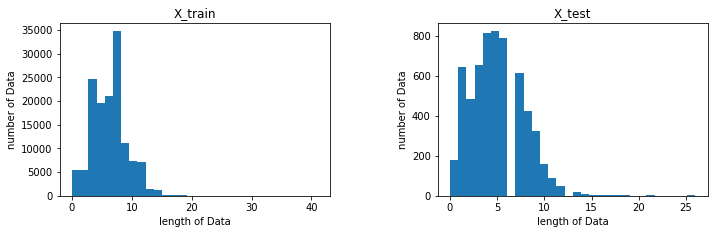

In [96]:
#시각화: 문장의 토큰 최대 길이

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
print("train data 최대 길이 : ", max(len(l) for l in X_train)) 
print("train data 평균 길이 : ", sum(map(len, X_train))/len(X_train))

print()

plt.hist([len(s) for s in X_train], bins=30)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.title("X_train")

plt.subplot(1,2,2)
print("test data 최대 길이 : ", max(len(l) for l in X_test)) 
print("test data 평균 길이 : ", sum(map(len, X_test))/len(X_test))
plt.hist([len(s) for s in X_test], bins=30)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.title("X_test")
plt.subplots_adjust(left = 0.1, bottom=0.1, right=1, top=0.9, wspace=0.4, hspace=0.5)
plt.show()

In [161]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(len(l) for l in X_train)
# 41로 padding
# 한국어 특성상 문장 끝이 중요하므로 오른쪽에 치우치게 패딩

X_train_pad = pad_sequences(X_train, maxlen = max_len)
X_test_pad = pad_sequences(X_test, maxlen = max_len)

print(X_train_pad[-2])
print(len(X_train_pad))
print(len(X_test_pad))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0   10   63    3  110    2 1072  820]
139390
6121


In [162]:
#label - 원핫인코딩

from tensorflow.keras.utils import to_categorical
print(len(set(y_train_aug)))
y_train = to_categorical(y_train_last,len(set(y_train_aug)))
y_test = to_categorical(y_test_data,len(set(y_train_aug)))

y_train = np.array(y_train)
y_test = np.array(y_test)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

7
139390
6121
139390
6121


In [163]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_pad, y_train, test_size=0.1, shuffle=True, stratify=y_train)
print(y_valid[0])
print(len(X_valid))
print(len(y_valid))

[0. 0. 1. 0. 0. 0. 0.]
13939
13939
